In [1]:
# Import necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
df18 = pd.read_csv('India Startup Funding/startup_funding2018.csv')

## Cleaning 2018 Data

#### Explore Data

In [3]:
# Check the shape of the data set
df18.shape

(526, 6)

In [4]:
# Check the data types of the columns
df18.dtypes

Company Name     object
Industry         object
Round/Series     object
Amount           object
Location         object
About Company    object
dtype: object

In [5]:
# Check for missing values
df18.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [6]:
df18.head(50)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


##### A simple dive into the data shows some missing data replaced by dashes(-) in multiple columns

In [7]:
# Find the missing values
df18[df18['Industry']=='—']

,Company Name,Industry,Round/Series,Amount,Location,About Company
58,MissMalini Entertainment,—,Seed,"₹104,000,000","Mumbai, Maharashtra, India",MissMalini Entertainment is a multi-platform n...
105,Jagaran Microfin,—,Debt Financing,"₹550,000,000","Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution...
121,FLEECA,—,Seed,—,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.
146,WheelsEMI,—,Series B,"$14,000,000","Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI..."
153,Fric Bergen,—,Venture - Series Unknown,—,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food ...
174,Deftouch,—,Seed,—,"Bangalore, Karnataka, India",Deftouch is a mobile game development company ...
181,Corefactors,—,Seed,—,"Bangalore, Karnataka, India","Corefactors is a leading campaign management, ..."
210,Cell Propulsion,—,Seed,"₹7,000,000","Bangalore, Karnataka, India",Cell Propulsion is an electric mobility startu...
230,Flathalt,—,Angel,50000,"Gurgaon, Haryana, India",FInd your Customized Home here.
235,dishq,—,Seed,400000,"Bengaluru, Karnataka, India",dishq leverages food science and machine learn...


In [8]:
# Replace Dashes(-) in all columns with NaN
df18 =df18.replace('—',np.nan)

#### Exploring 'About Company' column

In [9]:
df18['About Company'].head()

0    TheCollegeFever is a hub for fun, fiesta and f...
1    A startup which aggregates milk from dairy far...
2            Leading Online Loans Marketplace in India
3    PayMe India is an innovative FinTech organizat...
4    Eunimart is a one stop solution for merchants ...
Name: About Company, dtype: object

##### 'About Company' column has categorical data that will not be needed for the analysis and can be dropped 

In [10]:
df18.drop(columns='About Company', axis=1,inplace = True)
df18.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location'], dtype='object')

#### Exploring 'Industry' column

In [11]:
df18['Industry']

0      Brand Marketing, Event Promotion, Marketing, S...
1                                   Agriculture, Farming
2       Credit, Financial Services, Lending, Marketplace
3                            Financial Services, FinTech
4                     E-Commerce Platforms, Retail, SaaS
                             ...                        
521     B2B, Business Development, Internet, Marketplace
522                                      Tourism, Travel
523           Food and Beverage, Food Delivery, Internet
524                               Information Technology
525           Biotechnology, Health Care, Pharmaceutical
Name: Industry, Length: 526, dtype: object

##### Most of the entries in the Industry column contain more than 1 industry so keep the first industry in every entry 

In [12]:
df18['Industry'] = df18['Industry'].str.split(',').str[0]
df18['Industry']

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
                ...          
521                       B2B
522                   Tourism
523         Food and Beverage
524    Information Technology
525             Biotechnology
Name: Industry, Length: 526, dtype: object

In [13]:
# Check for unique entries in Industry column
df18['Industry'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       nan, 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [14]:
# Check number of unique Industries
df18['Industry'].nunique()

147

##### Industry column has many unique values. Some values may be inputted under synonyms so aggregate column into fewer unique values or categories

In [15]:
# Loop to get the values in the unique values in the Industry column

industry_name_list = df18['Industry'].tolist()

unique_industries = []
for industry in industry_name_list:
    if industry not in unique_industries:
        unique_industries.append(industry)


        
for industry in unique_industries:
    print(industry)


Brand Marketing
Agriculture
Credit
Financial Services
E-Commerce Platforms
Cloud Infrastructure
Internet
Market Research
Information Services
Mobile Payments
B2B
Apps
Food Delivery
Industrial Automation
Automotive
Finance
Accounting
Artificial Intelligence
Internet of Things
Air Transportation
Food and Beverage
Autonomous Vehicles
Enterprise Software
Logistics
Insurance
Information Technology
Blockchain
Education
E-Commerce
Renewable Energy
E-Learning
Clean Energy
Transportation
Fitness
Hospitality
Media and Entertainment
Broadcasting
EdTech
Health Care
nan
Sports
Big Data
Cloud Computing
Food Processing
Trading Platform
Consumer Goods
Wellness
Fashion
Consulting
Biotechnology
Communities
Consumer
Consumer Applications
Mobile
Advertising
Marketplace
Aerospace
Home Decor
Energy
Digital Marketing
Creative Agency
Consumer Lending
Health Diagnostics
Banking
Embedded Systems
Beauty
AgTech
Credit Cards
Software
Manufacturing
Hospital
Events
3D Printing
Digital Entertainment
Funding Platform


In [16]:
# Create categories as lists

Agriculture = ['Agriculture','Farming']

Marketing = ['Brand Marketing','Market Research','Advertising','Digital Marketing']

Technology = ['Reading Apps','Search Engine','Smart Cities','Fraud Detection','File Sharing','Nanotechnology','Enterprise Software','E-Commerce Platforms','E-Commerce','Cloud Infrastructure','Internet','Apps','Industrial Automation','Artificial Intelligence','Internet of Things','Autonomous Vehicles','Enterprise Software','Information Technology','Industrial Automation','E-Commerce','Big Data','Cloud Computing','Trading Platform','Biotechnology','Mobile','Aerospace','Embedded Systems','AgTech','Software','Information Services','3D Printing']

Bank_Fin = ['Crowdfunding','Wealth Management','Mobile','Credit','Financial Services','Mobile Payments','Finance','Blockchain','Consumer Lending','Banking','Credit Cards','Credit']

Accounting = ['Accounting']

Insurance = ['Insurance','Health Insurance']

Food = ['Food Delivery','Food and Beverage','Food Processing']

Transport = ['Last Mile Transportation','Automotive','Air Transportation','Logistics','Transportation','Logistics']

Energy = ['Renewable Energy','Clean Energy','Energy']

Health = ['Health Care','Wellness','Health Diagnostics','Hospital','Veterinary','Medical Device','Alternative Medicine','Dental']

Sport_Fit = ['Fantasy Sports','Fitness','Sports','Basketball']

Manufacturing = ['Manufacturing', 'Industrial']

Beauty = ['Beauty','Cosmetics']

Info_media = ['Dating','News','Music','Online Portals','Online Games','eSports','Music Streaming','Digital Entertainment','Information Services','Media and Entertainment','Broadcasting']

Services = ['Packaging Services','Rental','Enterprise Resource Planning (ERP)','Consumer','Communities','Consumer Applications','Home Decor','Child care','Consumer Goods','Consulting','Marketplace','Creative Agency']

Government = ['Government','Classifieds']

Tourism = ['Tourism','Business Travel']

Events = ['Events','Wedding']

Edu = ['Education','E-Learning','EdTech','Continuing Education']

Hospitality = ['Hospitality']

Fashion = ['Fashion','Eyewear']

B2B = ['B2B']

nan = ['nan', 'Nan', 'NaN',None]

In [17]:
# Write function to put values into new categories
def new_cat(Industry):
    if Industry in Marketing:
        return 'Marketing'
    elif Industry in Agriculture:
        return 'Agriculture'
    elif Industry in Bank_Fin:
        return 'Banking & Finance'
    elif Industry in Accounting:
        return 'Accounting'
    elif Industry in Insurance:
        return 'Insurance'
    elif Industry in Technology:
        return 'Technology'
    elif Industry in Food:
        return 'Food & Beverage'
    elif Industry in Transport :
        return 'Logistics'
    elif Industry in Energy:
        return 'Energy'
    elif Industry in Health:
        return 'Health'
    elif Industry in Sport_Fit :
        return 'Sports & Fitness'
    elif Industry in Manufacturing:
        return 'Manufacturing'
    elif Industry in Beauty:
        return 'Beauty'
    elif Industry in Info_media:
        return 'Media & Entertainment'
    elif Industry in Services:
        return 'Services'
    elif Industry in Government:
        return 'Government'
    elif Industry in Tourism:
        return 'Tourism'
    elif Industry in Events:
        return 'Events'
    elif Industry in Edu:
        return 'Education'
    elif Industry in nan:
        return 'NaN'
    elif Industry in Hospitality:
        return 'Hospitality'
    elif Industry in Fashion:
        return 'Fashion'
    elif Industry in B2B:
        return 'B2B'
    
    

In [18]:
df18['Sector'] = df18['Industry'].apply(new_cat)

In [19]:
df18['Sector'].nunique()

22

In [20]:
df18['Sector'].unique()

array(['Marketing', 'Agriculture', 'Banking & Finance', 'Technology',
       'B2B', 'Food & Beverage', 'Logistics', 'Accounting', 'Insurance',
       'Education', 'Energy', 'Sports & Fitness', 'Hospitality',
       'Media & Entertainment', 'Health', None, 'Services', 'Fashion',
       'Beauty', 'Manufacturing', 'Events', 'Government', 'Tourism'],
      dtype=object)

In [21]:
df18['Sector'].isna().sum()

98

In [22]:
# Visualizing Sector Column
#plt.figure(figsize=(8, 6))

#df18 = df18.dropna(subset=['Sector'])
# Create a histogram using seaborn
#sns.histplot(data=df18, x='Sector', bins=22, edgecolor='black')

# Add labels and title
#plt.xlabel('Sectors')
#plt.ylabel('Frequency')
#plt.title('Sector Stats')

#xtick_values = df18['Sector'].unique()

# Rotate x values
#plt.xticks(ticks=xtick_values, rotation=45, ha='right')

# Display the histogram
#plt.show()


In [23]:
# Drop Industry column 
df18.drop('Industry', axis=1, inplace=True)

#### Exploring Round/Series Column

In [24]:
# Check for unique values
df18['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

##### One of the unique values is a google docs link. Drop it

In [25]:
# Drop the row that has google docs link
df18 = df18[df18['Round/Series'] != 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']

# Reset the row index
df18.reset_index(drop=True, inplace=True)


In [26]:
# Check for number of unique values 
df18['Round/Series'].nunique()

20

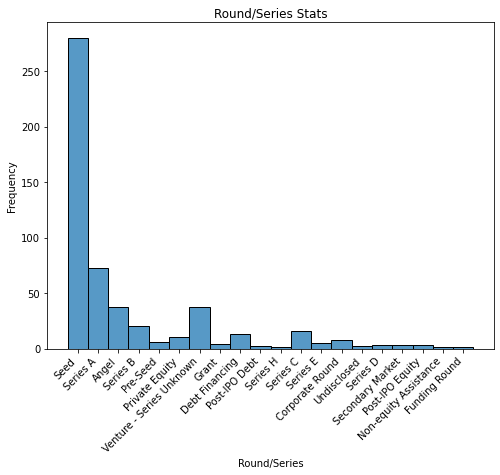

In [27]:
plt.figure(figsize=(8, 6))

# Create a histogram using seaborn
sns.histplot(data=df18, x='Round/Series', bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Round/Series')
plt.ylabel('Frequency')
plt.title('Round/Series Stats')

# Rotate x values
plt.xticks(rotation=45, ha='right')

# Display the histogram
plt.show()



In [28]:
df18.columns

Index(['Company Name', 'Round/Series', 'Amount', 'Location', 'Sector'], dtype='object')

#### Exploring Amount column

In [29]:
# Check for missing values
df18['Amount'].isna().sum()

148

In [30]:
df18['Amount']

0           250000
1      ₹40,000,000
2      ₹65,000,000
3          2000000
4              NaN
          ...     
520      225000000
521            NaN
522           7500
523    ₹35,000,000
524       35000000
Name: Amount, Length: 525, dtype: object

In [31]:
# Remove commas
df18['Amount'] = df18['Amount'].replace(',','')

##### Amount column contains currency signs and rupee amounts. Remove currency signs, convert to float and replace with dollar equivalent

In [32]:
# Create separate dataframe for rupee amounts
df_rupees = df18[df18['Amount'].astype(str).str.contains('₹')]

In [33]:
# convert rupees to dollars
df_rupees['Amount'] = df_rupees['Amount'].apply(lambda x: x.replace('₹','').replace(',','')).astype('float')
df_rupees['Amount'] = df_rupees['Amount']*0.0146

# update the original dataframe
df18.loc[df18['Amount'].isin(df_rupees['Amount'])] = df_rupees

<ipython-input-33-935f16b1ade1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rupees['Amount'] = df_rupees['Amount'].apply(lambda x: x.replace('₹','').replace(',','')).astype('float')
<ipython-input-33-935f16b1ade1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rupees['Amount'] = df_rupees['Amount']*0.0146


In [34]:
# update the original dataframe 
df18.update(df_rupees)

In [35]:
# Remove dollar sign
df18['Amount'] = df18['Amount'].str.replace('$', '')

In [36]:
# Replace commas
df18['Amount'] = df18['Amount'].str.replace(',','')

In [37]:
df18['Amount'] = df18['Amount'].astype(float)

In [38]:
# Replace all the NaN values with the mean 
df18['Amount'].replace(to_replace = np.nan, value = df18['Amount'].mean(), inplace = True)

In [39]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  525 non-null    object 
 1   Round/Series  525 non-null    object 
 2   Amount        525 non-null    float64
 3   Location      525 non-null    object 
 4   Sector        428 non-null    object 
dtypes: float64(1), object(4)
memory usage: 20.6+ KB


In [40]:
# Rename Amount column to reflect currency
df18.rename(columns={'Amount':'Amount($)'},inplace = True)

In [41]:
df18.columns

Index(['Company Name', 'Round/Series', 'Amount($)', 'Location', 'Sector'], dtype='object')

#### Exploring Location column

In [42]:
df18['Location']

0           Bangalore, Karnataka, India
1            Mumbai, Maharashtra, India
2               Gurgaon, Haryana, India
3           Noida, Uttar Pradesh, India
4      Hyderabad, Andhra Pradesh, India
                     ...               
520         Bangalore, Karnataka, India
521             Haryana, Haryana, India
522          Mumbai, Maharashtra, India
523          Mumbai, Maharashtra, India
524          Chennai, Tamil Nadu, India
Name: Location, Length: 525, dtype: object

##### Location column contains more info than needed. Trim each entry to show only city

In [43]:
df18['Location'] = df18['Location'].str.split(',').str[0]
df18.head(20)

,Company Name,Round/Series,Amount($),Location,Sector
0,TheCollegeFever,Seed,2.500000e+05,Bangalore,Marketing
1,Happy Cow Dairy,Seed,2.317039e+07,Mumbai,Agriculture
2,MyLoanCare,Series A,2.317039e+07,Gurgaon,Banking & Finance
3,PayMe India,Angel,2.000000e+06,Noida,Banking & Finance
4,Eunimart,Seed,2.317039e+07,Hyderabad,Technology
5,Hasura,Seed,1.600000e+06,Bengaluru,Technology
6,Tripshelf,Seed,2.317039e+07,Kalkaji,Technology
7,Hyperdata.IO,Angel,2.317039e+07,Hyderabad,Marketing
8,Freightwalla,Seed,2.317039e+07,Mumbai,Technology
9,Microchip Payments,Seed,2.317039e+07,Bangalore,Banking & Finance


##### Location column contains the name Bangalore and Bengaluru which are the same cities but different translations. Replace and one with the other

In [44]:
# Replace Bengaluru with Bangalore

df18['Location'].replace('Bengaluru', 'Bangalore', inplace=True)
df18['Location'].replace('New Delhi', 'Delhi', inplace=True)

In [45]:
df18.head(20)

,Company Name,Round/Series,Amount($),Location,Sector
0,TheCollegeFever,Seed,2.500000e+05,Bangalore,Marketing
1,Happy Cow Dairy,Seed,2.317039e+07,Mumbai,Agriculture
2,MyLoanCare,Series A,2.317039e+07,Gurgaon,Banking & Finance
3,PayMe India,Angel,2.000000e+06,Noida,Banking & Finance
4,Eunimart,Seed,2.317039e+07,Hyderabad,Technology
5,Hasura,Seed,1.600000e+06,Bangalore,Technology
6,Tripshelf,Seed,2.317039e+07,Kalkaji,Technology
7,Hyperdata.IO,Angel,2.317039e+07,Hyderabad,Marketing
8,Freightwalla,Seed,2.317039e+07,Mumbai,Technology
9,Microchip Payments,Seed,2.317039e+07,Bangalore,Banking & Finance


#### Exploring Company Name column

In [46]:
df18['Company Name']

0        TheCollegeFever
1        Happy Cow Dairy
2             MyLoanCare
3            PayMe India
4               Eunimart
             ...        
520                Udaan
521    Happyeasygo Group
522               Mombay
523           Droni Tech
524              Netmeds
Name: Company Name, Length: 525, dtype: object

In [47]:
df18['Company Name'].isna().sum()

0

#### Check for duplicates

In [48]:
# Find number of duplicates
df18.duplicated().sum()

1

In [49]:
# Drop duplicate
df18.drop_duplicates()

,Company Name,Round/Series,Amount($),Location,Sector
0,TheCollegeFever,Seed,2.500000e+05,Bangalore,Marketing
1,Happy Cow Dairy,Seed,2.317039e+07,Mumbai,Agriculture
2,MyLoanCare,Series A,2.317039e+07,Gurgaon,Banking & Finance
3,PayMe India,Angel,2.000000e+06,Noida,Banking & Finance
4,Eunimart,Seed,2.317039e+07,Hyderabad,Technology
...,...,...,...,...,...
520,Udaan,Series C,2.250000e+08,Bangalore,B2B
521,Happyeasygo Group,Series A,2.317039e+07,Haryana,Tourism
522,Mombay,Seed,7.500000e+03,Mumbai,Food & Beverage
523,Droni Tech,Seed,2.317039e+07,Mumbai,Technology


#### Rename some of the columns to match the other datasets

In [50]:
df18.rename(columns={'Round/Series':'Stage'}, inplace = True)
df18.rename(columns={'Location':'HeadQuarter'}, inplace = True)
df18.rename(columns={'Company Name':'Company/Brand'}, inplace = True)

In [51]:
df18.columns

Index(['Company/Brand', 'Stage', 'Amount($)', 'HeadQuarter', 'Sector'], dtype='object')

In [52]:
df18.head(10)

,Company/Brand,Stage,Amount($),HeadQuarter,Sector
0,TheCollegeFever,Seed,2.500000e+05,Bangalore,Marketing
1,Happy Cow Dairy,Seed,2.317039e+07,Mumbai,Agriculture
2,MyLoanCare,Series A,2.317039e+07,Gurgaon,Banking & Finance
3,PayMe India,Angel,2.000000e+06,Noida,Banking & Finance
4,Eunimart,Seed,2.317039e+07,Hyderabad,Technology
5,Hasura,Seed,1.600000e+06,Bangalore,Technology
6,Tripshelf,Seed,2.317039e+07,Kalkaji,Technology
7,Hyperdata.IO,Angel,2.317039e+07,Hyderabad,Marketing
8,Freightwalla,Seed,2.317039e+07,Mumbai,Technology
9,Microchip Payments,Seed,2.317039e+07,Bangalore,Banking & Finance


In [53]:
# Create new column 'Funding Year' with year 2018 to distinguish from other datasets when joining

df18["Funding Year"] = "2018"

In [54]:
df18["Funding Year"]

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
520    2018
521    2018
522    2018
523    2018
524    2018
Name: Funding Year, Length: 525, dtype: object